## Function to fetch the data.

In [1]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
s=requests.get(url).content
housing = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


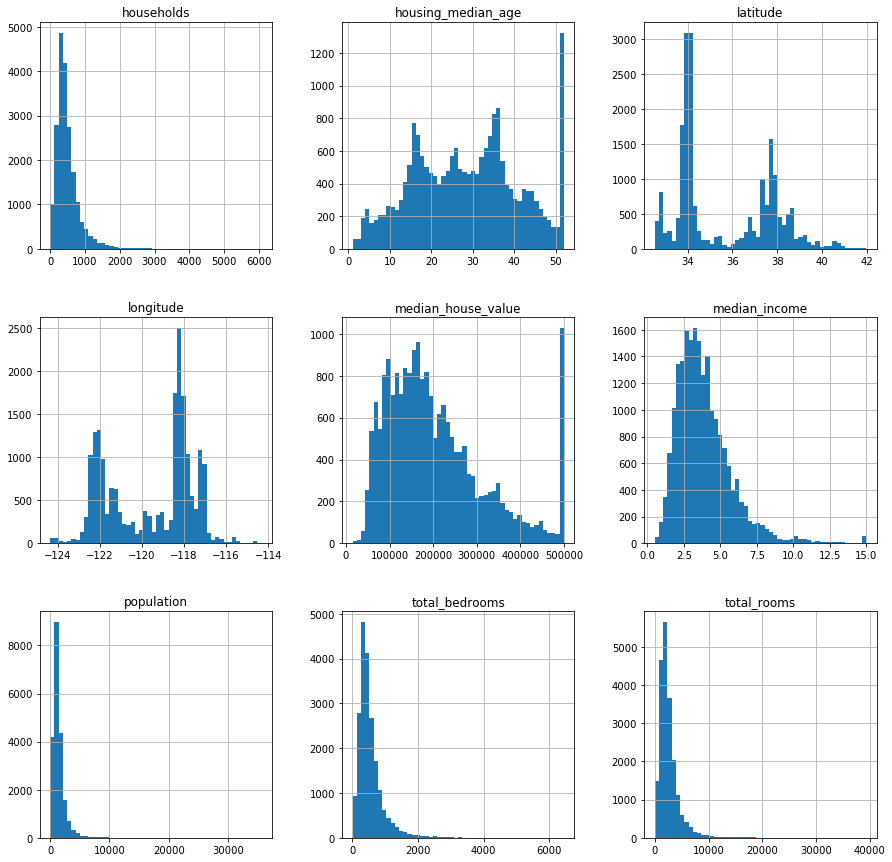

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins = 50, figsize = (15,15));

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
train_set,test_set = train_test_split(housing,test_size = 0.2,random_state = 1)
print(len(train_set),'train +',len(test_set),' test')

16512 train + 4128  test


### Create an additional attributes 'income category' to understand it better.

In [10]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace = True)

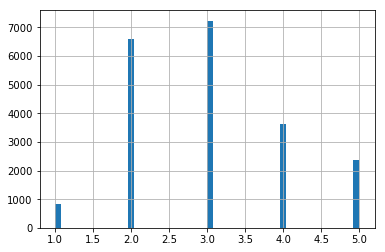

In [11]:
housing['income_cat'].hist(bins = 50);

## Stratified sampling based on the income category.
####   Test set generation using stratified sampling.

In [12]:
#Stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 1)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [14]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [15]:
housing['income_cat'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [16]:
print(len(strat_train_set),'train +',len(start_test_set),' test')

16512 train + 4128  test


In [17]:
#Now income category should be removed so that dataset get in it's actual format.

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_cat            20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [18]:
housing.drop(['income_cat'],axis = 1,inplace = True)

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### It's time to get started with Exploratory Data Analysis.

In [20]:
#Discover and visualize the dataset to gain insights.
#copied the stratified training set to housing for visualization.
housing = strat_train_set.copy()

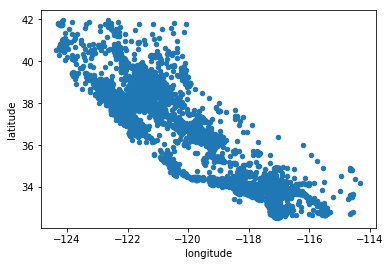

In [21]:
housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude');

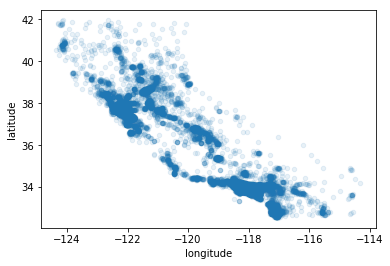

In [22]:
#getting the high density area by setting alpha to 0.1
housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude',alpha = 0.1);

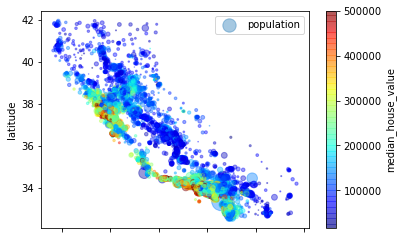

In [23]:
#the radius of each circle represents the district population(option s).
#color represents the price(option c).
#predefined colormap(option cmap) called jet which ranges from blue(low prices) to red(high prices).

housing.plot(kind = 'scatter', x='longitude',y = 'latitude',alpha = 0.4, s = housing['population']/100,cmap = plt.get_cmap('jet'),label = 'population',c = 'median_house_value',colorbar = True)
plt.legend();

### Looking for co-relations.

In [24]:
housing.corr()['median_house_value'].sort_values(ascending = False) #co-relation ranges from -1 to 1.

median_house_value    1.000000
median_income         0.684828
income_cat            0.642465
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

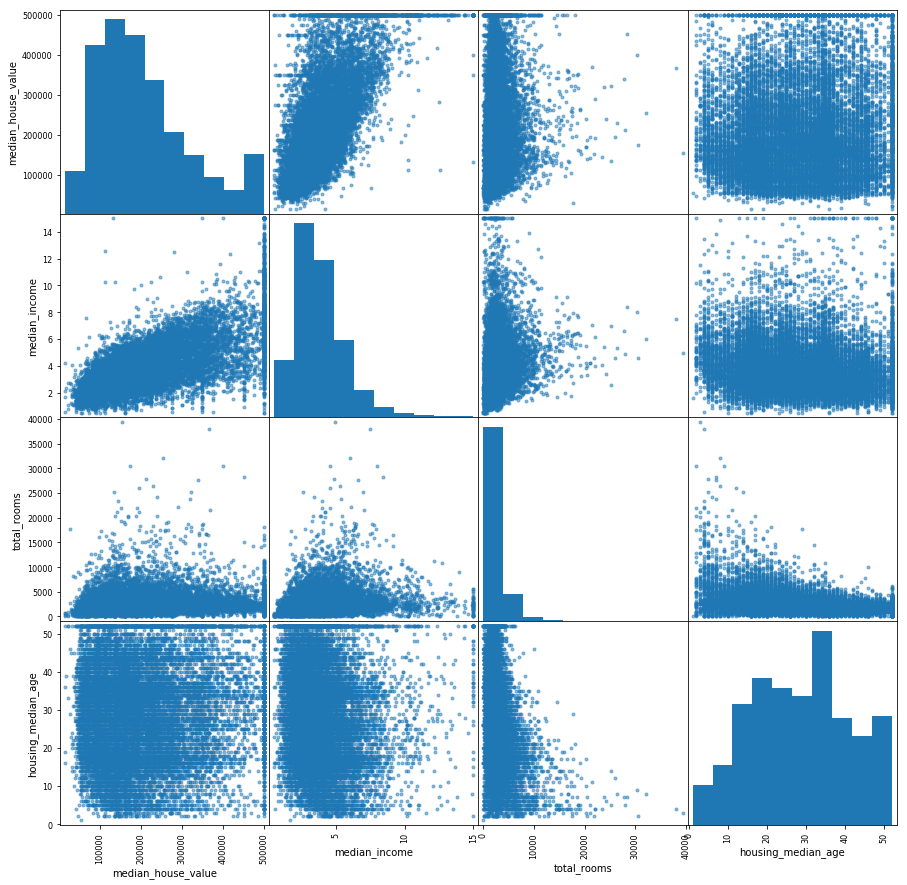

In [25]:
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize = (15,15));

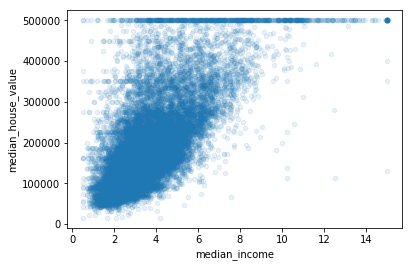

In [26]:
#The most promising attribute to predict the median house value is the median income
#alpha tells about the opacity.
housing.plot(kind = 'scatter', x = 'median_income', y= 'median_house_value', alpha = 0.1);

In [27]:
## Here plot reveals :
# 1. The co-relation is very strong (upward trend and most of the points are not too dispersed).
# 2. The price cap is clearly visible as a horizontal line at $500,000.

### Experimenting with attribute combinations.

In [28]:
#Let's create some new attributes.

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [29]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_household,population_per_household
longitude,1.000000,-0.924134,-0.111588,0.044415,0.070146,0.100851,0.055818,-0.013672,-0.043824,-0.008486,-0.034403,0.093785,0.000930
latitude,-0.924134,1.000000,0.015882,-0.034892,-0.066266,-0.107384,-0.069504,-0.082153,-0.146748,-0.089246,0.110571,-0.115465,0.006642
housing_median_age,-0.111588,0.015882,1.000000,-0.361921,-0.321678,-0.301220,-0.305833,-0.115020,0.107684,-0.146281,-0.158709,0.135663,0.013166
total_rooms,0.044415,-0.034892,-0.361921,1.000000,0.929588,0.859194,0.917847,0.198109,0.133566,0.222837,0.144551,-0.187114,-0.023014
total_bedrooms,0.070146,-0.066266,-0.321678,0.929588,1.000000,0.878086,0.979825,-0.007167,0.049941,0.018752,-0.000518,0.087227,-0.026810
population,0.100851,-0.107384,-0.301220,0.859194,0.878086,1.000000,0.907188,0.008148,-0.025008,0.031759,-0.068781,0.035731,0.064714
households,0.055818,-0.069504,-0.305833,0.917847,0.979825,0.907188,1.000000,0.013529,0.065778,0.041668,-0.079167,0.068398,-0.025918
median_income,-0.013672,-0.082153,-0.115020,0.198109,-0.007167,0.008148,0.013529,1.000000,0.684828,0.900142,0.356620,-0.619249,0.023636
median_house_value,-0.043824,-0.146748,0.107684,0.133566,0.049941,-0.025008,0.065778,0.684828,1.000000,0.642465,0.171947,-0.256396,-0.026596
income_cat,-0.008486,-0.089246,-0.146281,0.222837,0.018752,0.031759,0.041668,0.900142,0.642465,1.000000,0.339611,-0.632395,0.013570


In [30]:
#let's look the co-relation matrix again with median_house_value.
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.684828
income_cat                  0.642465
rooms_per_household         0.171947
total_rooms                 0.133566
housing_median_age          0.107684
households                  0.065778
total_bedrooms              0.049941
population                 -0.025008
population_per_household   -0.026596
longitude                  -0.043824
latitude                   -0.146748
bedrooms_per_household     -0.256396
Name: median_house_value, dtype: float64

## Now it's time to prepare the data for Machine learning Algorithms.

In [31]:
#First let's revert to clean training set.
#Note - drop() creats a copy of the data and does not effect the start_train_set.
#seperate the target and predictors instances.

housing = strat_train_set.drop('median_house_value',axis = 1) #predictor variable.
housing_labels = strat_train_set['median_house_value'].copy() #target variable.

##### Data cleaning.

In [32]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [33]:
housing['total_bedrooms'].dtypes

dtype('float64')

In [34]:
#to fix total_bedrooms attributes we have generally three options.
#dropna(),drop() and fillna()
#we can use any of the following three.

#housing.dropna(subsets = ['total_bedrooms'])  option - 1
#housing.frop('total_bedrooms',axis = 1)  option - 2
median = housing['total_bedrooms'].median() #it will be usefull later.
housing['total_bedrooms'].fillna(median,inplace = True)  #option - 3

In [35]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
income_cat            0
dtype: int64

##### scikit-Learn provides a handy class to take care of missing values : Imputer 

In [36]:
#1. create an Imputer instance specifing that you want to replace each attribute's missing values with the median of that attribute.

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

In [37]:
#2. since median can only be computed on numerical attributes, so we need to create a copy of the data without the text attribute's(ocean_proximity).

housing_num = housing.drop('ocean_proximity', axis = 1)

In [38]:
#3. fit the imputer instance to the training data using the fit() method.

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

##### The imputer has simply computed the median of each attributes and stored the result in it's "statistics_" instence variable.

In [39]:
imputer.statistics_

array([ -118.49   ,    34.26   ,    29.     ,  2122.5    ,   434.     ,
        1163.     ,   409.     ,     3.52945,     3.     ])

In [40]:
housing_num.median().values

array([ -118.49   ,    34.26   ,    29.     ,  2122.5    ,   434.     ,
        1163.     ,   409.     ,     3.52945,     3.     ])

In [42]:
#4. Now we can use this 'trained' imputer to transform the training set by replacing missing values by the learned medians.

x = imputer.transform(housing_num) # the result is a plain Numpy array containing transformed features.

In [43]:
#5. if we want to convert the plain Numpy array into Pandas DataFrame then : 
housing_tr = pd.DataFrame(x, columns = housing_num.columns)

## Handling text(object) and categorical Attributes.

##### ocean_proximity is a text attribute so we can't compute it's median. hence we convert these text labels to numbers.
##### scikit-learn provides a transformer for this task called : LabelEncoder.


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 1, 0, ..., 0, 1, 1], dtype=int64)

In [45]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

In [46]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [47]:
#One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant
#values. Obviously this is not the case (forexample, categories 0 and 4 are more similar than categories 0 and 1). To fix this
#issue, a common solution is to create one binary attribute per category: one attributeequal to 1 when the category is “<1H OCEAN” 
#(and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called 
#'one-hot encoding', because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

##### Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors.

In [48]:
#Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [49]:
#notice that the output is a SciPy sparse matrix, instead of NumPy array. to convert it into numpy array just use toarray() method.
housing_cat_1hot.toarray()

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

## Feature scaling.

In [50]:
#Note that scaling the target values is generally not required.
#There are two common ways to get all attributes to have the same scale:
#min-max scaling(normalization) and standardization.
#values are shifted and rescaled so that they end up ranging from 0 to 1. 
#We do this by subtracting the min value and dividing by the max minus the min.

##### Scikit-Learn provides a transformer called 'MinMaxScaler' for normalization. It has a 'feature_range' hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

###### Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms. However, standardizationis much less affected by outliers. Scikit-Learn provides a transformer called 'StandardScaler' for standardization.

### TRANSFORMATION PIPELINE.

##### There are many data transformation steps that need to be executed inthe right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations

In [51]:
#A small pipeline for the numerical attributes.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn_features.transformers import CombinedAttributesAdder
num_pipeline = Pipeline([('imputer',Imputer(strategy = 'median')),
                         ('std_scaler',StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

#the last estimator is a StandardScaler, which is a transformer.

In [52]:
#it's a pipeline for numerical values, and you also need to apply the 'LabelBinarizer' on the categorical values:
#how can you join these transformations into a single pipeline? Scikit-Learn provides a 'FeatureUnion' class for this. 
#You give it a list of transformers (which can be entire transformer pipelines), and when its transform()
#method is called it runs each transformer’s transform() method in parallel, waits for their output, and then concatenates them
#and returns the result (and of course calling its fit() method calls all each transformer’s fit() method). A full pipeline 
#handling both numerical and categorical attributes may look like this:

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer
cat_attribs = ['ocean_proximity']
num_attribs = list(housing_num)

num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),#Each subpipeline starts with a selector transformer: it simply transforms the data byselecting the desired attributes (numerical or categorical), dropping the rest, and convertingthe resulting DataFrame to a NumPy array.
                         ('imputer',Imputer(strategy = 'median')),
                         ('std_scaler',StandardScaler())
                        ])

cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)),
                        ('label_binarizer',LabelBinarizer())
                        ])

full_pipeline = FeatureUnion(transformer_list = [('num_pipeline',num_pipeline),
                                                ('cat_pipeline',cat_pipeline),
                                                ])

housing_prepared = full_pipeline.fit_transform(housing)

NameError: name 'DataFrameSelector' is not defined

### Select and train a model.

In [53]:
#Training and Evaluating on the Training Set.

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_num,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#let's measure this regression model's RMSEhousing_prediction =  on whole training set.

from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_num)
lin_mse = mean_squared_error(housing_labels,housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70020.536992580834

In [55]:
#Okay, this is better than nothing but clearly not a great score: most districts’ median_housing_values range between $120,000 
#and $265,000, so a typical prediction error of $70,020 is not very satisfying. This is an example of a model underfitting
#the training data. When this happens it can mean that the features do not provide enough information to make good predictions,
#or that the model is not powerful enough.

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_num,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [56]:
#let's measure this regression model's RMSE on whole training set.

housing_prediction = tree_reg.predict(housing_num)
tree_mse = mean_squared_error(housing_labels,housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [57]:
#here data is overfitted.

### Better evaluation using cross-validation.

In [58]:
#One way to evaluate the Decision Tree model would be to use the train_test_split function to split the training set into a smaller
#training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set.

#A great alternative is to use Scikit-Learn’s cross-validation feature. The following code performs K-fold cross-validation: it 
#randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 
#times,picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing 
#the 10 evaluation scores:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_num,housing_labels,scoring = 'neg_mean_squared_error',cv = 10)
rmse_scores = np.sqrt(-scores)

#let's look at the results:
def display_scores(scores):
    print('scores :', scores)
    print('mean :', scores.mean())
    print('standard deviation :', scores.std())
    
display_scores(rmse_scores)

scores : [ 69310.79712947  75145.36553528  69175.04068282  70717.10292478
  72814.92507995  73569.21692051  70113.38627958  70231.01390695
  74066.81033541  72245.65068849]
mean : 71738.9309483
standard deviation : 2005.41773608


In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_num,housing_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [60]:
housing_prediction = forest_reg.predict(housing_num)
forest_mse = mean_squared_error(housing_labels,housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22406.361580871784

In [61]:
scores = cross_val_score(forest_reg,housing_num,housing_labels,scoring = 'neg_mean_squared_error',cv = 10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

scores : [ 53931.1435358   50959.57252672  52125.29170446  51948.30140179
  52813.92772253  52604.9994771   52324.98786523  50644.95074273
  57287.66256394  50620.68063842]
mean : 52526.1518179
standard deviation : 1867.99340692


## Fine-Tune model.

#### grid search.

In [62]:

#the following code searches for the best combination of hyperparameter values for the 'RandomForestRegressor'.

from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators' : [3,10,30], 'max_features': [2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
             ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid, cv = 5,scoring = 'neg_mean_squared_error')

grid_search.fit(housing_num,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [63]:
#This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict
#then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict.

#All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model five times 
#(since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, 
#but when it is done you can get the best combination of parameters like this.

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Randomized Search.

In [65]:
#The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the
#hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much
#the same way as the 'GridSearchCV' class.

#### Ensemble Methods.

#### Analyze the Best Models and Their Errors.

In [66]:
#RandomForestRegressor can indicate the relative importance of each atttribute for making accurate predictions.

feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([ 0.15282865,  0.14449723,  0.06653442,  0.0259174 ,  0.02983313,
        0.03980214,  0.02440704,  0.47095444,  0.04522556])

In [67]:
#Let’s display these importance scores next to their corresponding attribute names:

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
attributes = num_attribs + extra_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.47095444423823651, 'median_income'),
 (0.15282864537464785, 'longitude'),
 (0.14449722748166929, 'latitude'),
 (0.066534417094529993, 'housing_median_age'),
 (0.045225557425018166, 'income_cat'),
 (0.039802137505188934, 'population'),
 (0.029833126420626941, 'total_bedrooms'),
 (0.025917402757987193, 'total_rooms'),
 (0.024407041702095178, 'households')]

## Now is the time to evaluate the final model on the test set.

In [73]:
#final_model = grid_search.best_estimator_

#x_test = start_test_set.drop("median_house_value", axis=1)
#y_test = start_test_set['median_house_value'].copy()

#x_test_prepared = full_pipeline.transform(x_test)
#final_prediction = final_model.predict(x_test_prepared)

#final_mse = mean_squared_error(y_test,final_prediction)
#final_rmse = np.sqrt(final_mse)

In [74]:
#Above code is not worked because 'fill_pipeline' has not worked in previously code, so go and check what error in previously code throws.